# Pythonのcv2を用いた画像の取り込み

## 参考

[OpenCV-Pythonチュートリアル » OpenCVのGUI機能 » 動画を扱う](
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_gui/py_video_display/py_video_display.html)

In [2]:
# opencv-pythonパッケージのインストールで利用できる
# https://pypi.org/project/opencv-python/
import cv2

In [7]:
!cat capture_camera_cv2.py

import cv2

# cv2 を使ってカメラからキャプチャし，毎フレーム毎の画像を表示する
# ウィンドウが開き，キャプチャした映像が表示される
# ESCキーで停止する．
# Jupyter Notebookではウィンドウが閉じずに固まるため，スクリプトで実行する．

def capture_camera(mirror=True, size=None):
    """Capture video from camera"""
    # カメラをキャプチャする
    cap = cv2.VideoCapture(0) # 0はカメラのデバイス番号

    while True:
        # retは画像を取得成功フラグ
        ret, frame = cap.read()

        # 鏡のように映るか否か
        if mirror is True:
            frame = frame[:,::-1]

        # フレームをリサイズ
        # sizeは例えば(800, 600)
        if size is not None and len(size) == 2:
            frame = cv2.resize(frame, size)

        # フレームを表示する
        cv2.imshow('camera capture', frame)

        k = cv2.waitKey(1) # 1msec待つ
        if k == 27: # ESCキーで終了
            break
    
    # キャプチャを解放する
    cap.release()
    cv2.destroyAllWindows()

# プログラム開始
capture_camera()


In [8]:
# スクリプトの実行
!python capture_camera_cv2.py

<IPython.core.display.Javascript object>


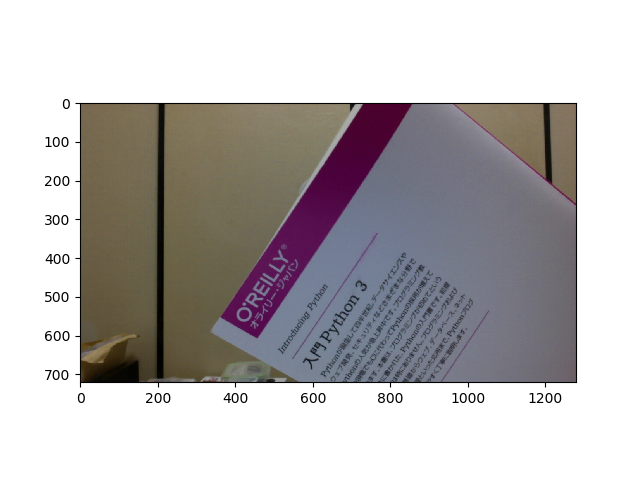

In [13]:
%matplotlib nbagg
import cv2
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 画像の表示を matplotlib を用いて行う例
# 画像取り込み部分は cv2 を利用
# 'q' キーを押すと停止する

def cap_frame(c):
    # 1フレーム読み込む
    r, f = c.read()
    if r:
        # OpenCVのBGRからmatplotlibのRGBに色を変換
        f = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
    return r, f

# カメラからのキャプチャのためのオブジェクト取得
cap = cv2.VideoCapture(0) # 0はカメラのデバイス番号

im = plt.imshow(cap_frame(cap)[1])

# 更新処理
def update(i):
    is_captured, frame = cap_frame(cap)
    if is_captured:
        im.set_data(frame)
        
ani = FuncAnimation(plt.gcf(), update, interval=1)

# クローズ動作
def close(event):
    if event.key == 'q':
        # 解放処理
        plt.close(event.canvas.figure)
        cap.release()

# キーイベントによる終了動作の設定
cid = plt.gcf().canvas.mpl_connect("key_press_event", close)

# 表示開始
plt.show()



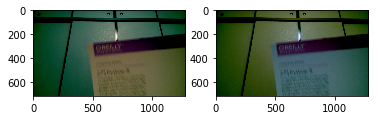

In [14]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# カメラからのキャプチャのためのオブジェクト取得
cap = cv2.VideoCapture(0) # 0はカメラのデバイス番号

# 1フレーム読み込む
ret, frame = cap.read()

# 読み込みに成功して入れば表示する
if ret:
    # OpenCVのBGRからmatplotlibのRGBに色を変換する
    show_img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 

    area, (l, r) = plt.subplots(ncols=2)
    l.imshow(frame)
    r.imshow(show_img)

# 解放処理
cap.release()

# ラズパイでの画像読み込み
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_gui/py_image_display/py_image_display.html#matplotlib


    


In [3]:
# RPiでカメラ画像を撮影（raspistill コマンド）
!raspistill -o sample.jpg

/bin/sh: raspistill: command not found


In [4]:
# RPiでコマンドで動画を撮影
!raspivid -o video.h264 -t 5000

/bin/sh: raspivid: command not found


In [5]:
# 動画の再生
!omxplayer video.h264

/bin/sh: omxplayer: command not found


In [ ]:
# picamera を使う例
# https://picamera.readthedocs.io/en/release-1.12/_modules/picamera/
# sudo apt-get install python3-picamera
import picamera
camera = picamera.PiCamera()
# 撮影
camera.capture('image.jpg')

# 上下・左右の反転
camera.hflip = True
camera.vflip = True

# カメラのプレビューを表示・停止
camera.start_preview()
camera.stop_preview()

# カメラの設定いろいろ
camera.brightness = 70 # 明るさ
camera.sharpness = 0
camera.contrast = 0
camera.brightness = 50
camera.saturation = 0
camera.ISO = 0
camera.video_stabilization = False
camera.exposure_compensation = 0
camera.exposure_mode = 'auto'
camera.meter_mode = 'average'
camera.awb_mode = 'auto'
camera.image_effect = 'none'
camera.color_effects = None
camera.rotation = 0
camera.hflip = False
camera.vflip = False
camera.crop = (0.0, 0.0, 1.0, 1.0)

# 動画の記録(例では5秒)
camera.start_recording('video.h264')
picamera.wait_recording(5)
camera.stop_recording()

In [ ]:
# 写真を保存する例
import picamera
import datetime
import os

# 現在時刻からファイル名，フォルダ名を決定する
now = datetime.datetime.now()
dir_name = now.strftime('%Y%m%d')
dir_path = '/home/pi/nas/'+dir_name
file_name = now.strftime('%H%M%S')

# ディレクトリがなければ作成する
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    os.chmod(dir_path, 0777)

# 撮影し，ファイルを保存する
picamera = picamera.PiCamera()
picamera.capture(dir_path+'/'+file_name+'.jpg')